# EDA

Dataset: https://www.kaggle.com/sakhawat18/asteroid-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Basic Column Definition
- **SPK-ID**: Object primary SPK-ID
- **Object ID**: Object internal database ID
- **Object fullname**: Object full name/designation. Combination of provisional and permanent designation. Some asteroids do not yet have a permanent designation.
- **pdes**: Object primary designation (most recent designation). Provisional designation or permanent designation (if available). When a new object is found that cannot be identified with an already-known object, Minor Planet Center (MPC) assigns a provisional designation- year of discovery, two letters, and further digits if needed (eg. 1989 AC). When orbit is well enough determined, object is assigned permanent designation- a number. https://web.archive.org/web/20060216182947/http://www.iau.org/MINOR_PLANETS_NAMING.245.0.html   
- **name**: Object IAU name. Discoverer is invited to suggest a name only after object receives permanent designation.
- **NEO**: Near-Earth Object (NEO) flag
- **PHA**: Potentially Hazardous Asteroid (PHA) flag. Target.
- **H**: Absolute magnitude parameter. Visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle (the magnitude of an asteroid at zero phase angle and at unit heliocentric and geocentric distances)
- **Diameter**: object diameter (from equivalent sphere) km Unit
- **Albedo**: Geometric albedo. Shininess/reflectiveness of the surface. https://www.nasa.gov/mission_pages/WISE/multimedia/gallery/neowise/pia14733.html
- **Diameter_sigma**: 1-sigma uncertainty in object diameter km Unit
- **Orbit_id**: Orbit solution ID
- **Epoch**: Epoch of osculation in modified Julian day form
- **Equinox**: Equinox of reference frame
- **e**: Orbit eccentricity. Amount by which orbit deviates from a perfect circle (0 - circular, 0 to 1 - elliptic, 1 - parabolic escape, < 1 - hyperbola 
- **a**: Semi-major axis au Unit. One half of the major axis of the elliptical orbit; also the mean distance from the Sun
- **q**: perihelion distance au Unit. Perihelion is orbit’s closest point to the Sun
- **i**: inclination; angle with respect to x-y ecliptic plane
- **tp**: Time of perihelion passage TDB Unit. The time at which an object is closest to the sun.
- **moid_ld**: Earth Minimum Orbit Intersection Distance au Unit. Distance between closest points of orbits of asteroid and Earth. Direct measure of close approach/collision risk.
- **class**: orbit classification

#### Class values (orbit classifications)

- AMO	Amor:	Near-Earth asteroid orbits similar to that of 1221 Amor (a > 1.0 AU; 1.017 AU < q < 1.3 AU).
- APO	Apollo:	Near-Earth asteroid orbits which cross the Earth's orbit similar to that of 1862 Apollo (a > 1.0 AU; q < 1.017 AU).
- AST	Asteroid:	Asteroid orbit not matching any defined orbit class.
- ATE	Aten:	Near-Earth asteroid orbits similar to that of 2062 Aten (a < 1.0 AU; Q > 0.983 AU).
- CEN	Centaur:	Objects with orbits between Jupiter and Neptune (5.5 AU < a < 30.1 AU).
- HYA	Hyperbolic Asteroid:   Asteroids on hyperbolic orbits (e > 1.0).
- IEO	Interior Earth Object:   An asteroid orbit contained entirely within the orbit of the Earth (Q < 0.983 AU).
- IMB	Inner Main-belt Asteroid:   Asteroids with orbital elements constrained by (a < 2.0 AU; q > 1.666 AU).
- MBA	Main-belt Asteroid:   Asteroids with orbital elements constrained by (2.0 AU < a < 3.2 AU; q > 1.666 AU).
- MCA	Mars-crossing Asteroid:   Asteroids that cross the orbit of Mars constrained by (1.3 AU < q < 1.666 AU; a < 3.2 AU).
- OMB	Outer Main-belt Asteroid:   Asteroids with orbital elements constrained by (3.2 AU < a < 4.6 AU).
- PAA	Parabolic Asteroid:   Asteroids on parabolic orbits (e = 1.0).
- TJN	Jupiter Trojan:   Asteroids traped in Jupiter's L4/L5 Lagrange points (4.6 AU < a < 5.5 AU; e < 0.3).
- TNO	TransNeptunian Object:   Objects with orbits outside Neptune (a > 30.1 AU).

#### Additional notes
- The astronomical unit (au) is defined by the IAU as exactly 149,597,870,700 m. Based on avg distance between Earth and Sun.
- NEO: An asteroid or comet with a perihelion distance less than or equal to 1.3 au. 99% of NEOs are asteroids. 
- 1 sigma uncertainty means 1 standard deviation.

In [2]:
data = pd.read_csv('data/dataset.csv')

data.info()

/Users/lauramiller/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [3]:
data.shape

(958524, 45)

In [4]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


## Examine columns

In [6]:
print(data.id.value_counts(normalize=True))
print('\nUnique Values:')
data.id.nunique()

a0447626    0.000001
bK15TO5P    0.000001
bK16CR1A    0.000001
bK10FD8K    0.000001
bK16F34O    0.000001
              ...   
bK08T87U    0.000001
a0109100    0.000001
bK14OE8G    0.000001
a0238766    0.000001
a0208807    0.000001
Name: id, Length: 958524, dtype: float64

Unique Values:


958524

In [7]:
print(data.full_name.value_counts(normalize=True))
print('\nUnique Values:')
data.full_name.nunique()

  2082 Galahad (7588 P-L)    0.000001
314752 (2006 SA239)          0.000001
157631 (2005 WA159)          0.000001
       (2015 GG34)           0.000001
       (2017 BY75)           0.000001
                               ...   
       (2015 FD324)          0.000001
       (2014 RE18)           0.000001
 63094 (2000 WP142)          0.000001
       (2005 RW31)           0.000001
       (2018 AC12)           0.000001
Name: full_name, Length: 958524, dtype: float64

Unique Values:


958524

In [8]:
print(data.name.value_counts(normalize=True))
print('\nUnique Values:')
data.name.nunique()

Zsigmond         0.000045
Spacesora        0.000045
MacGregor        0.000045
Wilkens          0.000045
Hamra            0.000045
                   ...   
Gavioliremo      0.000045
Novotroitskoe    0.000045
Pholus           0.000045
Meslier          0.000045
Scorzelli        0.000045
Name: name, Length: 22064, dtype: float64

Unique Values:


22064

In [9]:
print(data.pdes.value_counts(normalize=True))
print('\nUnique_Values')
data.pdes.nunique()

2014 GS55     0.000001
319503        0.000001
319515        0.000001
319514        0.000001
319513        0.000001
                ...   
2015 OA18     0.000001
2006 SR154    0.000001
2014 KZ17     0.000001
2001 FR208    0.000001
2016 FD4      0.000001
Name: pdes, Length: 958524, dtype: float64

Unique_Values


958524

The above features appear to be unique identifiers for each row, not properties that will be effective in a classification model.

In [10]:
print(data.orbit_id.value_counts(normalize=True))
print('\nUnique_Values')
data.orbit_id.nunique()

1            0.052312
JPL 1        0.049549
JPL 2        0.036064
JPL 3        0.031226
12           0.030397
               ...   
MPO490516    0.000001
MPO478183    0.000001
MPO479019    0.000001
MPO485984    0.000001
MPO481628    0.000001
Name: orbit_id, Length: 4690, dtype: float64

Unique_Values


4690

In [11]:
print(data.equinox.value_counts(normalize=True))
print('\nUnique_Values')
data.equinox.nunique()

J2000    1.0
Name: equinox, dtype: float64

Unique_Values


1

In [12]:
print(data['class'].value_counts(normalize=True))
print('\nUnique_Values')
data['class'].nunique()

MBA    0.892992
OMB    0.029582
IMB    0.021241
MCA    0.019494
APO    0.013236
AMO    0.008823
TJN    0.008577
TNO    0.003618
ATE    0.001804
CEN    0.000528
AST    0.000079
IEO    0.000023
HYA    0.000004
Name: class, dtype: float64

Unique_Values


13

In [13]:
data.prefix.value_counts(normalize=True)

A    1.0
Name: prefix, dtype: float64

In [14]:
print(data['moid_ld'].value_counts(normalize=True))
print('\nUnique_Values')
data['moid_ld'].nunique()

0.000000      0.020653
390.563229    0.000026
454.702336    0.000026
482.236114    0.000025
456.009947    0.000023
                ...   
197.488987    0.000001
795.506289    0.000001
376.472550    0.000001
333.391042    0.000001
248.113777    0.000001
Name: moid_ld, Length: 314301, dtype: float64

Unique_Values


314301

In [15]:
# What percent of asteroids are near earth objects?

data.neo.value_counts(normalize=True)

N    0.976114
Y    0.023886
Name: neo, dtype: float64

In [16]:
# Check for class imbalance. What percent of asteroids are hazardous?

data.pha.value_counts(normalize=True)

N    0.997799
Y    0.002201
Name: pha, dtype: float64

Data displays a heavy class imbalance. ~ 99.8% of asteroids are non-hazardous. There are far, far fewer potentially hazardous asteroids. A naive classifier that always predicts a negative ("N") label will be accurate 99.8% of the time. I will address class imbalances after selecting a best-performing model. 

Furthermore, a metric like recall (sensitivity, or `true positives / (true positives + false negatives`) should take priority in model evaluation, as we want to make sure we identify every potentially hazardous asteroid. The cost of missing one potentially hazardous body can be quite disastrous.

In [39]:
data['class'].value_counts()

MBA    832650
OMB     27170
IMB     19702
MCA     17789
APO     12684
AMO      8448
TJN      8122
TNO      3459
ATE      1729
CEN       503
AST        57
IEO        22
Name: class, dtype: int64

In [8]:
sns.set_context('talk', font_scale=0.75)
sns.set_style('darkgrid')
colors = ['#682dd3', '#fe4134', '#fe5448']

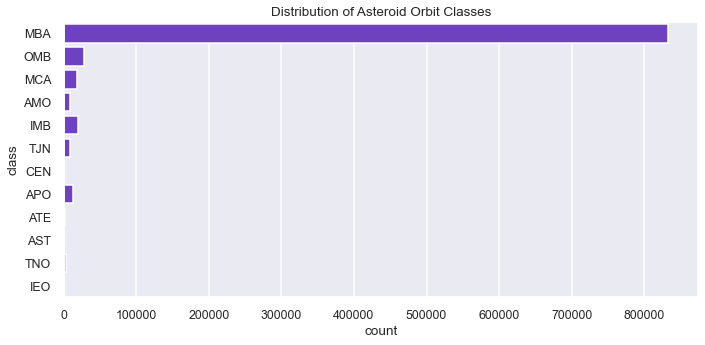

In [148]:
# What are the counts of various asteroid classes? Which class contains the most asteroids?

plt.figure(figsize=(10, 5))
ax = sns.countplot(y='class', data=data, color='#682dd3')
plt.title('Distribution of Asteroid Orbit Classes')
plt.tight_layout()
plt.savefig('images/class-dist.png', bbox_inches='tight')
plt.savefig('images/class-dist-hr.png', dpi=200, bbox_inches='tight');

Most asteroids are MBA, or main belt asteroids (asteroids with orbital elements constrained by (2.0 AU < a < 3.2 AU; q > 1.666 AU). They are within the asteroid belt, orbiting between Mars and Jupiter. The fewest asteroids are IE0 (interior earth objects), which have orbits contained within the orbit of earth( Q < 0.983 AU)

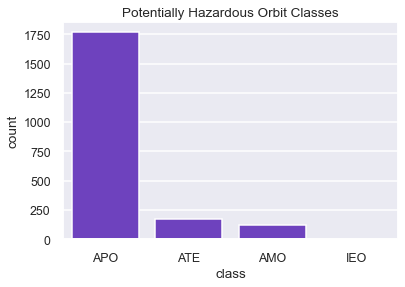

In [155]:
# What are the orbit classifications of potentially hazardous asteroids?

sns.countplot(x='class', data=data[data['pha'] == 'Y'], color='#682dd3')
plt.title('Potentially Hazardous Orbit Classes')
plt.savefig('images/pha-class.png', bbox_inches='tight')
plt.savefig('images/pha-class-hr.png', dpi=200, bbox_inches='tight');

Most potentially hazardous asteroids are of the APO (Apollo) class (Near-Earth asteroid orbits which cross the Earth's orbit with orbits similar to that of 1862 Apollo (a > 1.0 AU; q < 1.017 AU).

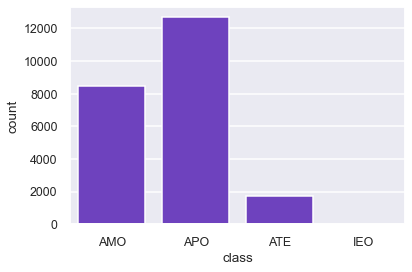

In [147]:
# What are the orbit classes of near earth objects?

sns.countplot(x='class', data=data[data['neo'] == 'Y'], color='#682dd3');

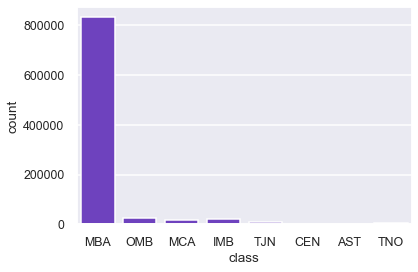

In [157]:
# Are there asteroids that are not NEOs in the 4 classes above?

sns.countplot(x='class', data=data[data['neo'] == 'N'], color='#682dd3');

The 4 NEO-containing classes do not appear in the plot above, so they are entirely comprised of Near Earth Objects.

In [19]:
# Of NEOs, what percentage are potentially hazardous?

data[data['neo'] == 'Y']['pha'].value_counts(normalize=True)

N    0.909758
Y    0.090242
Name: pha, dtype: float64

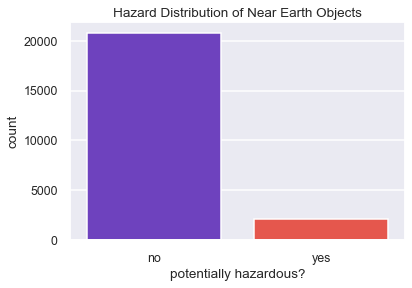

In [11]:
sns.countplot(x='pha', data = data[data['neo'] == 'Y'], palette=colors)
plt.title('Hazard Distribution of Near Earth Objects')
plt.xlabel('potentially hazardous?')
plt.xticks([0, 1], labels=['no', 'yes'])
plt.savefig('images/neo-pha.png', bbox_inches='tight')
plt.savefig('images/neo-pha-hr.png', dpi=200, bbox_inches='tight');

Most NEOs are non-hazardous (~91%) while 9% are potentially hazardous. While all phas are NEOs, not all NEOs are potentially hazardous.

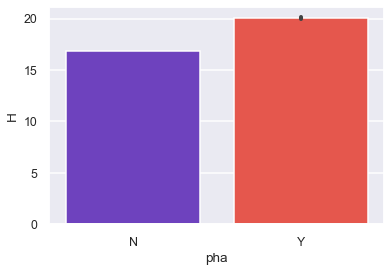

In [9]:
# Mean H (visual magnitude) of non-hazardous/ potentially hazardous asteroids

sns.barplot(x=data['pha'], y=data['H'], data=data.groupby('pha').mean().reset_index(), palette=colors);

On average, phas have a greater visual magnitude than non-hazardous asteroids.

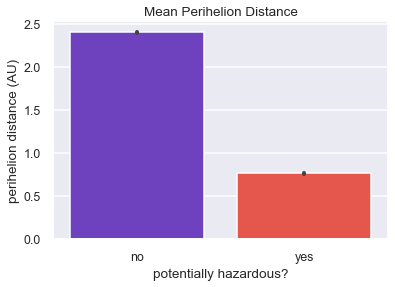

In [10]:
# Mean q (perihelion distance) for non-hazardous/potentially hazardous asteroids

sns.barplot(x=data['pha'], y=data['q'], data=data, palette=colors)
plt.title('Mean Perihelion Distance')
plt.xlabel('potentially hazardous?')
plt.ylabel('perihelion distance (AU)')
plt.xticks([0, 1], labels=['no', 'yes'])
plt.savefig('Images/q-pha.png', bbox_inches='tight')
plt.savefig('Images/q-pha-hr.png', dpi=200, bbox_inches='tight');

The mean perihelion distance is lower for phas, which means that their orbits come closer to the sun.

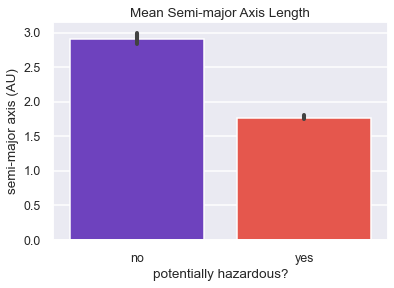

In [7]:
# Mean a for non-hazardous/potentially hazardous asteroids

sns.barplot(x="pha", y='a', data=data, palette=colors)
plt.title('Mean Semi-major Axis Length')
plt.xlabel('potentially hazardous?')
plt.ylabel('semi-major axis (AU)')
plt.xticks([0, 1], labels=['no', 'yes'])
plt.savefig('Images/a-pha.png', bbox_inches='tight')
plt.savefig('Images/a-pha-hr.png', dpi=200, bbox_inches='tight');

phas have smaller semi-major axis lengths. On average, their orbits are tighter than that of non-hazardous asteroids

In [89]:
# Mean moid_ld values for non-hazardous and potentially hazardous asteroids by class

crosstab = pd.crosstab(index=data['class'], columns=data['pha'], values=data['moid_ld'], aggfunc='mean')
crosstab

pha,N,Y
class,,
AMO,65.541659,13.689846
APO,21.674208,8.905461
AST,657.901061,NaN
ATE,18.056258,9.072017
CEN,3129.367152,NaN
IEO,57.550358,15.348035
IMB,314.225552,NaN
MBA,506.401837,NaN
MCA,234.240645,NaN


The 4 classes containing containing potentially hazardous asteroids also have the smallest mean values for `moid_ld`, as expected.

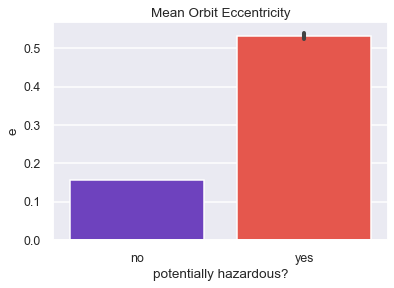

In [10]:
# Mean eccentricity of non-hazardous and potentially hazardous asteroids?

sns.barplot(x="pha", y="e", data=data, palette=colors)
plt.title('Mean Orbit Eccentricity')
plt.xlabel('potentially hazardous?')
plt.xticks([0, 1], labels=['no', 'yes'])
plt.savefig('images/e-pha.png', bbox_inches='tight')
plt.savefig('images/e-pha-hr.png', dpi=200, bbox_inches='tight');

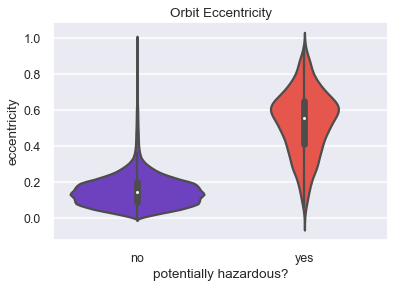

In [162]:
# Distribution of eccentricity for non-hazardous/ potentially hazardous asteroids.

sns.violinplot(x="pha", y="e", data=data, palette=colors)
plt.title('Orbit Eccentricity')
plt.xlabel('potentially hazardous?')
plt.ylabel('eccentricity')
plt.xticks([0, 1], labels=['no', 'yes'])
plt.savefig('images/e-pha-violin.png', bbox_inches='tight')
plt.savefig('images/e-pha-violin-hr.png', dpi=200, bbox_inches='tight');

## Address missing values

In [22]:
data.isna().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [23]:
data.isna().any().sum()

26

In [24]:
# NEOs

# Check perihelion distances. If <= 1.3 au, the object is NEO

data[data.neo.isna()]['q']

741612    5.260067
929462    0.255912
946657    5.858539
950563    8.820993
Name: q, dtype: float64

One missing entry is a NEO, the others are not.

In [25]:
data.at[929462, 'neo'] = 'Y'

In [26]:
data.neo.fillna(value='N', inplace=True)

In [27]:
# Drop ID cols & cols with 800K+ missing values

data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [28]:
# Equinox is the same for every entry, so this is also uninformative

# Class provides orbit information, but in broader categories. Drop orbit_id instead (which contains 4690 unique values)

cols = ['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'diameter', 'albedo', 'diameter_sigma', 'equinox', 'orbit_id']

data = data.drop(cols, axis=1)

In [29]:
data.isna().sum()

neo              0
pha          19921
H             6263
epoch            0
epoch_mjd        0
epoch_cal        0
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
tp               0
tp_cal           0
per              4
per_y            1
moid         19921
moid_ld        127
sigma_e      19922
sigma_a      19922
sigma_q      19922
sigma_i      19922
sigma_om     19922
sigma_w      19922
sigma_ma     19922
sigma_ad     19926
sigma_n      19922
sigma_tp     19922
sigma_per    19926
class            0
rms              2
dtype: int64

In [30]:
data = data.dropna()

In [31]:
data.shape

(932335, 34)

Even after dropping the remaining rows with missing data, we still have ~932K entries.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932335 entries, 0 to 958523
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        932335 non-null  object 
 1   pha        932335 non-null  object 
 2   H          932335 non-null  float64
 3   epoch      932335 non-null  float64
 4   epoch_mjd  932335 non-null  int64  
 5   epoch_cal  932335 non-null  float64
 6   e          932335 non-null  float64
 7   a          932335 non-null  float64
 8   q          932335 non-null  float64
 9   i          932335 non-null  float64
 10  om         932335 non-null  float64
 11  w          932335 non-null  float64
 12  ma         932335 non-null  float64
 13  ad         932335 non-null  float64
 14  n          932335 non-null  float64
 15  tp         932335 non-null  float64
 16  tp_cal     932335 non-null  float64
 17  per        932335 non-null  float64
 18  per_y      932335 non-null  float64
 19  moid       932335 non-n

In [34]:
data.to_csv('data/data_cleaned.csv')